<a href="https://colab.research.google.com/github/VladislavRkm/cs102/blob/homework06/homework06_data_analysis_python_vldslv_rkm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$ 
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 1

Выполните все задания ниже с помощью библиотеки `pandas`.

### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
# из модуля google.colab импортируем модуль files для загрузки файла в код
from google.colab import files

In [ ]:
# Пункт 1
# uploaded = files.upload()
data_frame = pd.read_csv('music_genre.csv')
data_frame.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
# Пункты 2 и 3
random.seed(20)
data_frame = data_frame.iloc[[random.randint(0, len(data_frame)) for i in range(20000)]]
data_frame.drop_duplicates(keep="first", inplace=True)
print(len(data_frame))

16444


<ipython-input-10-b592b441c0d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame.drop_duplicates(keep="first", inplace=True)


In [ ]:
# Пункт 4
data_frame[data_frame.artist_name == "empty_field"]
print(len(data_frame[data_frame["artist_name"] == "empty_field"]))
data_frame.loc[data_frame["artist_name"] == "empty_field"]

828


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
9909,79273.0,empty_field,Daybreak's Bell,33.0,0.000955,0.431,251653.0,0.942,0.000207,G,0.1050,-3.993,Major,0.0435,?,4-Apr,0.737,Anime
20915,32173.0,empty_field,All Alright,48.0,0.084400,0.439,264093.0,0.591,0.000088,G#,0.1460,-5.754,Major,0.0273,78.355,4-Apr,0.482,Country
44650,41094.0,empty_field,Nausicaä of the Valley of the Winds - Nausicaä...,36.0,0.716000,0.171,251653.0,0.203,0.873000,F,0.1090,-16.418,Minor,0.0352,103.478,5-Apr,0.108,Classical
37565,53415.0,empty_field,Wait,61.0,0.197000,0.769,214436.0,0.465,0.018100,E,0.1550,-7.765,Minor,0.0634,98.01100000000001,4-Apr,0.185,Rock
19709,49189.0,empty_field,Monks,52.0,0.060600,0.731,200240.0,0.772,0.000000,G,0.2120,-4.817,Minor,0.1920,101.979,4-Apr,0.592,Alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46753,80237.0,empty_field,Take Your Time,54.0,0.229000,0.862,148747.0,0.598,0.003040,G#,0.1350,-6.667,Minor,0.0612,141.934,4-Apr,0.561,Hip-Hop
9085,79596.0,empty_field,Rain or Shine,14.0,0.554000,0.519,236547.0,0.281,0.000236,G,0.1550,-8.387,Major,0.0255,98.029,4-Apr,0.183,Anime
17349,62015.0,empty_field,Pistol Grip Pump,52.0,0.024300,0.673,196733.0,0.887,0.000004,F#,0.0654,-3.873,Minor,0.2550,92.553,4-Apr,0.726,Alternative
46665,31137.0,empty_field,Blessed,40.0,0.107000,0.900,188293.0,0.686,0.000000,F#,0.0352,-9.264,Minor,0.1880,111.72200000000001,4-Apr,0.778,Hip-Hop


In [ ]:
data_frame = data_frame.loc[data_frame["artist_name"] != "empty_field"]

### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [ ]:
# Пункт 1
genres = data_frame["music_genre"].drop_duplicates(keep="first")
print(genres)

47369        Hip-Hop
44974      Classical
17028    Alternative
6652           Anime
21458        Country
37548           Rock
11100           Jazz
1768      Electronic
26969            Rap
31090          Blues
10004            NaN
Name: music_genre, dtype: object


In [ ]:
music_dict = dict()
for genre in genres:
    count = len(data_frame[data_frame["music_genre"] == genre])
    part_of_genre = count / len(data_frame)
    if genre == genre:
        music_dict[genre] = part_of_genre
    print(f"Часть {genre} от общего количества: {part_of_genre}")

Часть Hip-Hop от общего количества: 0.10309938524590163
Часть Classical от общего количества: 0.10073002049180328
Часть Alternative от общего количества: 0.09951331967213115
Часть Anime от общего количества: 0.10245901639344263
Часть Country от общего количества: 0.09707991803278689
Часть Rock от общего количества: 0.09880891393442623
Часть Jazz от общего количества: 0.10092213114754098
Часть Electronic от общего количества: 0.10162653688524591
Часть Rap от общего количества: 0.09733606557377049
Часть Blues от общего количества: 0.09836065573770492
Часть nan от общего количества: 0.0


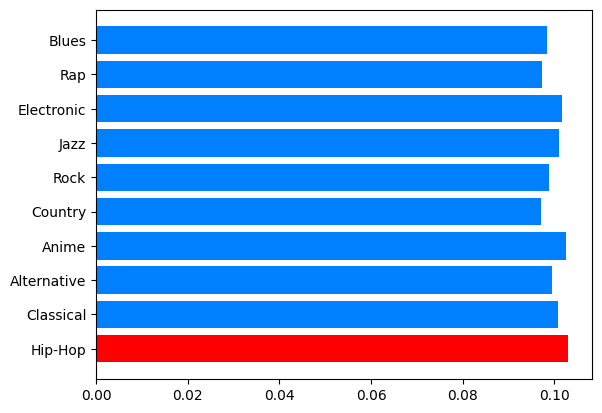

In [ ]:
# Пункт 2
labels = list(music_dict.keys())
values = list(music_dict.values())

colors = ["#0080ff" if v != max(values) else "#ff0000" for v in values]

plt.barh(labels, values, color=colors)
plt.show()

In [ ]:
# Пункт 3
print(data_frame.groupby(["music_genre"]).mean()["danceability"].idxmax())

Hip-Hop


<ipython-input-16-5758c8989489>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(data_frame.groupby(["music_genre"]).mean()["danceability"].idxmax())


In [ ]:
# Пункт 4
df_genre_mode = data_frame.groupby(["music_genre"])["mode"].value_counts()

for genre in labels:
    print(f'В жанре {genre} преобладает тональность {df_genre_mode[genre].idxmax()}')

В жанре Hip-Hop преобладает тональность Major
В жанре Classical преобладает тональность Major
В жанре Alternative преобладает тональность Major
В жанре Anime преобладает тональность Major
В жанре Country преобладает тональность Major
В жанре Rock преобладает тональность Major
В жанре Jazz преобладает тональность Major
В жанре Electronic преобладает тональность Major
В жанре Rap преобладает тональность Major
В жанре Blues преобладает тональность Major


### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [ ]:
# Пункт 1
most_tracks_artist = data_frame['artist_name'].value_counts().index[0]
print("Исполнитель с наибольшим количеством треков:", most_tracks_artist)

least_tracks_artist = data_frame['artist_name'].value_counts().index[-1]
print("Исполнитель с наименьшим количеством треков:", least_tracks_artist)

Исполнитель с наибольшим количеством треков: Wolfgang Amadeus Mozart
Исполнитель с наименьшим количеством треков: Ann Peebles


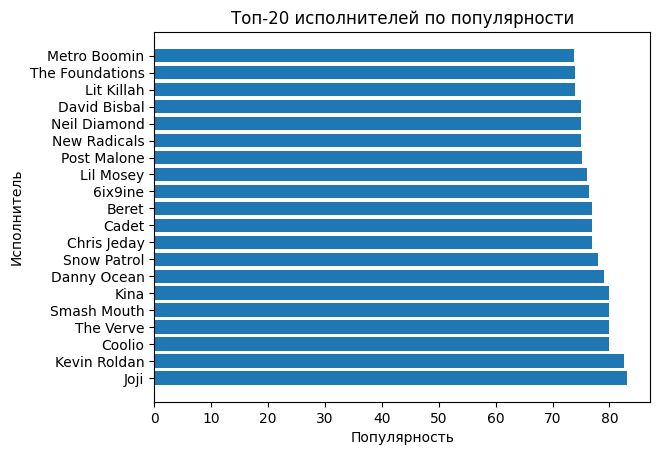

In [ ]:
# Пункт 2.1
# top_artists = data_frame.groupby('artist_name')['popularity'].sum().sort_values(ascending=False)[:20]
mean_popularity_by_artist = data_frame.groupby("artist_name")["popularity"].mean()
top_artists = mean_popularity_by_artist.sort_values(ascending=False)[:20]
plt.barh(top_artists.index, top_artists.values)
plt.title("Топ-20 исполнителей по популярности")
plt.xlabel("Популярность")
plt.ylabel("Исполнитель")
plt.show()

Самым популярным исполнителем по параметру "popularity" стал Joji

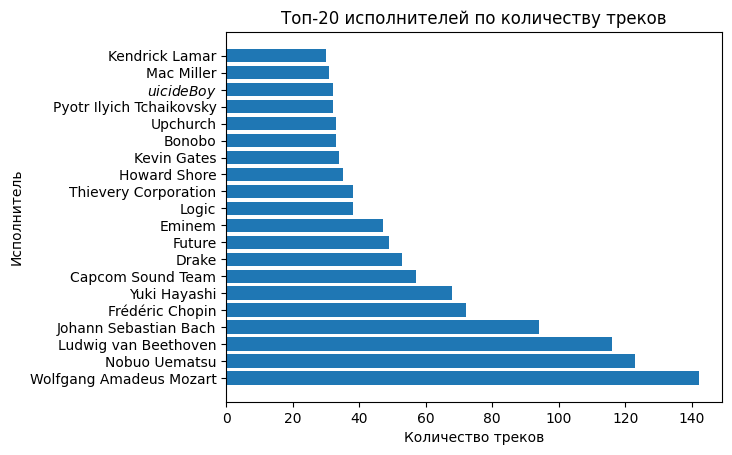

In [ ]:
# Пункт 2.2
# Группируем данные по имени исполнителя и подсчитываем количество треков в каждой группе
tracks_by_artist = data_frame.groupby("artist_name").size()

# Сортируем результаты в порядке убывания и выбираем только топ-20 исполнителей
top_artists = tracks_by_artist.sort_values(ascending=False)[:20]

# Строим диаграмму
plt.barh(top_artists.index, top_artists.values)
plt.title("Топ-20 исполнителей по количеству треков")
plt.xlabel("Количество треков")
plt.ylabel("Исполнитель")
plt.show()

Самое большое кол-во произведений у Моцарта. В целом по этому параметру лидируют исполнители классической музыки

### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

<ipython-input-21-bb69a690e929>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_frame.corr()


<Axes: >

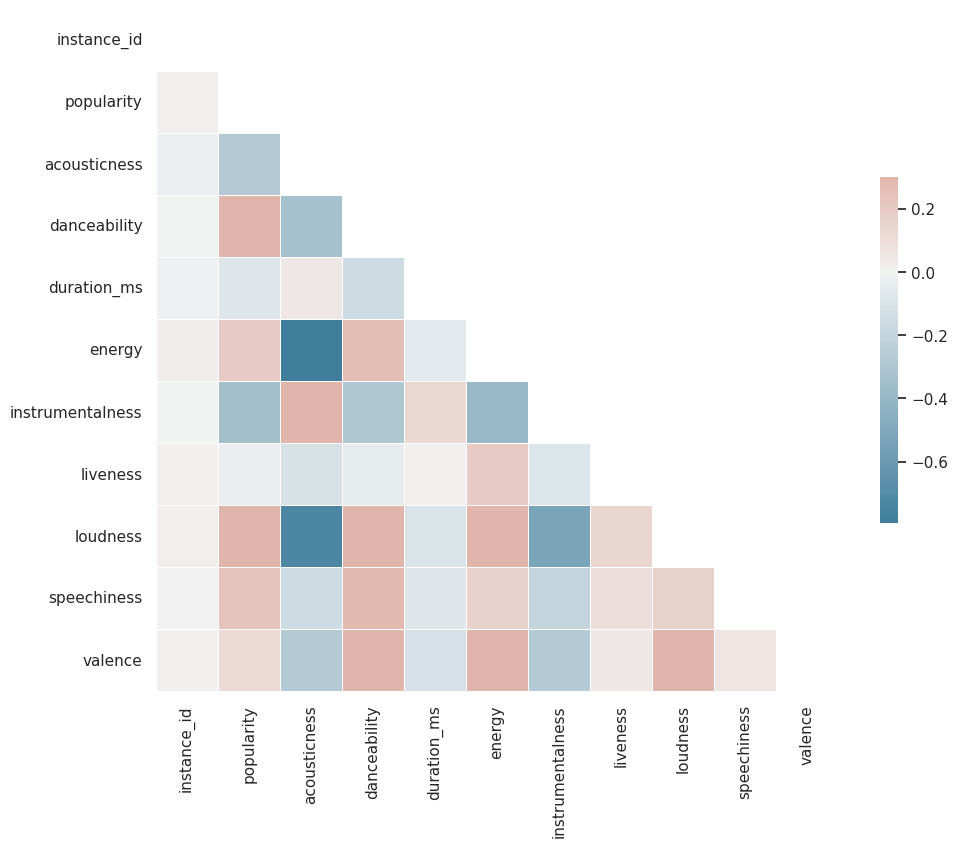

In [ ]:
corr = data_frame.corr()

sns.set(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Анализ матрицы:**

Чтобы определить, между какими характеристиками сильная корреляция, нужно посмотреть на ярко-выраженные блоки на диагонали и под диагональю матрицы. Чем ярче блок, тем сильнее корреляция между признаками.

Если блоки на матрице практически отсутствуют, значит, корреляции между признаками нет.

In [ ]:
corr = data_frame["popularity"].corr(data_frame["track_name"].astype(str).apply(len))
print(corr)
# чем меньше длина трека, тем он популярнее

-0.21986078531421943


### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

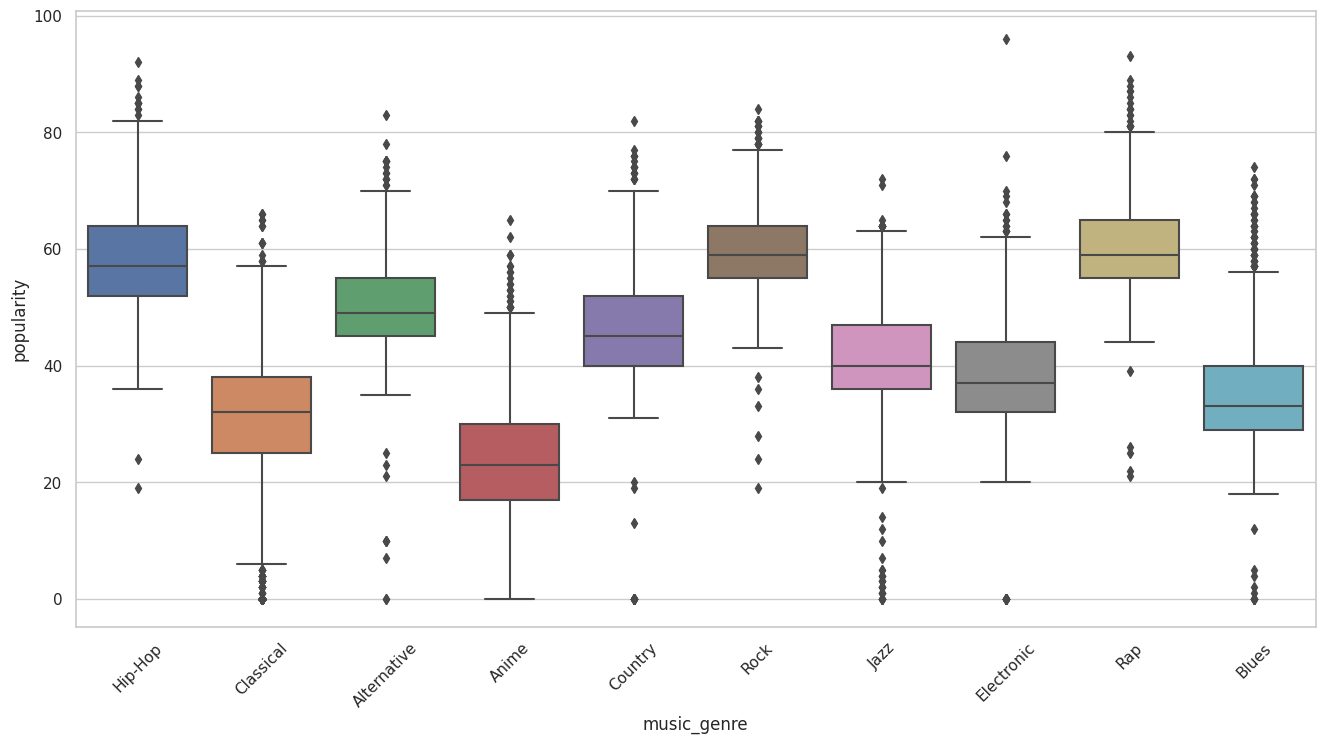

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.boxplot(x="music_genre", y="popularity", data=data_frame)
plt.xticks(rotation=45)
plt.show()

Если ящики похожи по форме и расположению, жанры имеют схожую популярность. К примеру, жанры "Country" и "Jazz" похожи между собой.

### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого популярного исполнителя. Диаграмма должна быть одна.

In [ ]:
# Находим топ-3 жанров и их самых популярных исполнителей
top_genres = data_frame.groupby('music_genre')['popularity'].sum().sort_values(ascending=False)[:3]

top_artists_by_genre = pd.DataFrame(columns=['music_genre', 'artist_name', 'popularity'])

for genre in top_genres.index:
    genre_df = data_frame[data_frame['music_genre'] == genre]
    top_artist = genre_df.groupby('artist_name')['popularity'].sum().idxmax()
    artist_popularity = genre_df[genre_df['artist_name'] == top_artist]['popularity'].sum()
    top_artists_by_genre = top_artists_by_genre.append({'music_genre': genre, 'artist_name': top_artist, 'popularity': artist_popularity}, ignore_index=True)

print(top_genres, top_artists_by_genre)

music_genre
Hip-Hop    93925.0
Rock       91942.0
Rap        91708.0
Name: popularity, dtype: float64   music_genre  artist_name  popularity
0     Hip-Hop       Eminem      1854.0
1        Rock  The Beatles      1532.0
2         Rap        Drake      1705.0


<ipython-input-24-0613bd03ab5e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_artists_by_genre = top_artists_by_genre.append({'music_genre': genre, 'artist_name': top_artist, 'popularity': artist_popularity}, ignore_index=True)
<ipython-input-24-0613bd03ab5e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_artists_by_genre = top_artists_by_genre.append({'music_genre': genre, 'artist_name': top_artist, 'popularity': artist_popularity}, ignore_index=True)
<ipython-input-24-0613bd03ab5e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_artists_by_genre = top_artists_by_genre.append({'music_genre': genre, 'artist_name': top_artist, 'popularity': artist_popularity}, ignore_index=True)


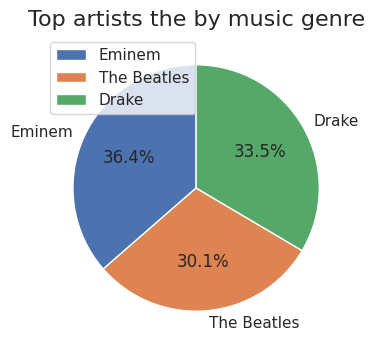

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.pie(top_artists_by_genre['popularity'], labels=top_artists_by_genre['artist_name'], autopct='%1.1f%%', startangle=90)
ax.set_title('Top artists the by music genre', fontsize=16)

plt.legend(top_artists_by_genre['artist_name'], loc='upper left')
plt.show()

### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

<ipython-input-26-aa52a23f01bd>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = filtered_df.mean()


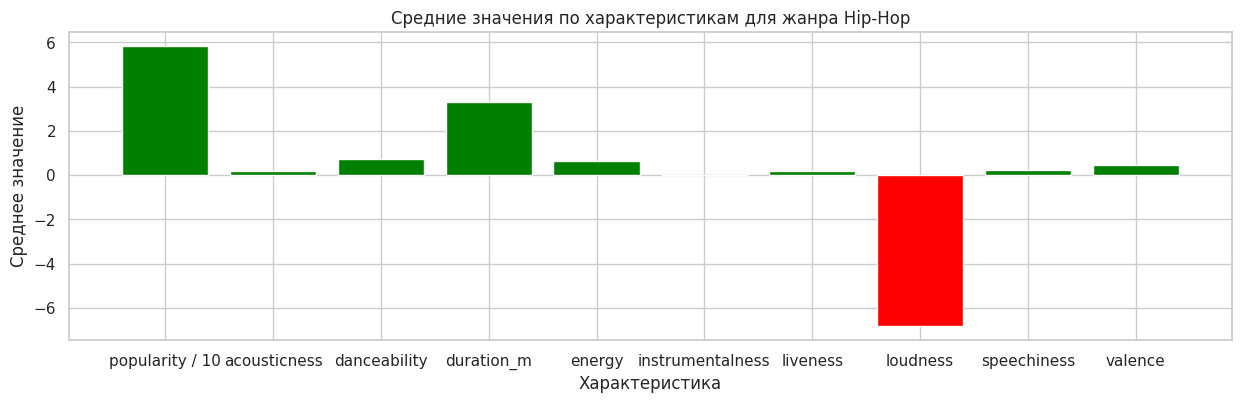

In [ ]:
# для самого популярного жанра

data_frame["duration_ms"] = data_frame["duration_ms"] / (1000 * 60)
data_frame["popularity"] = data_frame["popularity"] / (10)
data_frame = data_frame.rename(columns = {"duration_ms": "duration_m"})
data_frame = data_frame.rename(columns = {"popularity": "popularity / 10"})
most_popular_genre = data_frame["music_genre"].value_counts().index[0]
filtered_df = data_frame.loc[data_frame["music_genre"] == most_popular_genre]

# Вычисляем средние значения по всем столбцам
mean_values = filtered_df.mean()
mean_values = mean_values.drop(["instance_id"],axis = 0)
# mean_values.head(14)

fig, ax = plt.subplots(figsize=(15, 4))

colors = ["red" if value < 0 else "green" for value in mean_values]

# Строим график
ax.bar(mean_values.index, mean_values.values, color=colors)

# Добавляем заголовок и метки осей
ax.set_title("Средние значения по характеристикам для жанра {}".format(most_popular_genre))
ax.set_xlabel("Характеристика")
ax.set_ylabel("Среднее значение")

# Показываем график
plt.show()



<ipython-input-138-36ece675c35b>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = filtered_df.mean()


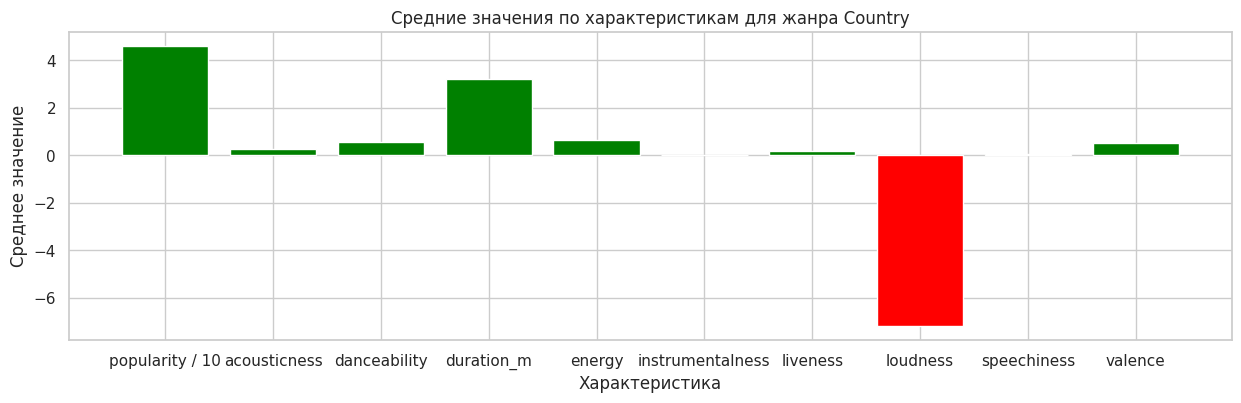

In [ ]:
# для самого непопулярного жанра

least_popular_genre = data_frame["music_genre"].value_counts().index[-1]
filtered_df = data_frame.loc[data_frame["music_genre"] == least_popular_genre]

# Вычисляем средние значения по всем столбцам
mean_values = filtered_df.mean()
mean_values = mean_values.drop(["instance_id"],axis = 0)
# mean_values.head(14)

fig, ax = plt.subplots(figsize=(15, 4))

colors = ["red" if value < 0 else "green" for value in mean_values]

# Строим график
ax.bar(mean_values.index, mean_values.values, color=colors)

# Добавляем заголовок и метки осей
ax.set_title("Средние значения по характеристикам для жанра {}".format(least_popular_genre))
ax.set_xlabel("Характеристика")
ax.set_ylabel("Среднее значение")

# Показываем график
plt.show()

### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [ ]:
data_frame["длительность_трека"] = ""
time = data_frame["duration_m"].dropna()
dict_length = {}
for key in time[time <= 3]:
    if key not in dict_length:
        dict_length[key] = "короткая"
for key in time[(time > 3) & (time <= 5)]:
    if key not in dict_length:
        dict_length[key] = "средняя"
for key in time[time > 5]:
    if key not in dict_length:
        dict_length[key] = "длинная"
data_frame["длительность_трека"] = [dict_length[key] if not pd.isna(key) else np.nan for key in data_frame["duration_m"]]
data_frame.head()

,instance_id,artist_name,track_name,popularity / 10,acousticness,danceability,duration_m,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,длительность_трека
47369,38580.0,Wale,Bad - Remix feat. Rihanna,6.1,0.307,0.807,3.980450,0.7020,0.000,F#,0.1110,-6.594,Minor,0.0748,114.038,4-Apr,0.4470,Hip-Hop,средняя
44974,76542.0,Anton Bruckner,"Symphony No. 8 in C Minor, WAB 108 (1890 editi...",2.9,0.963,0.197,24.085117,0.0893,0.863,F,0.6800,-19.377,Minor,0.0391,112.14399999999999,4-Apr,0.0379,Classical,длинная
17028,77888.0,Ari Lennox,Pop,5.0,0.809,0.631,2.307317,0.3150,0.000,B,0.1510,-10.606,Minor,0.0459,144.87,4-Apr,0.3350,Alternative,короткая
44171,54467.0,Antonio Vivaldi,"Four Seasons op.8 (1987 Digital Remaster), Win...",3.5,0.864,0.277,2.536667,0.1250,0.355,A#,0.0942,-25.015,Major,0.0417,?,3-Apr,0.2330,Classical,короткая
41662,81935.0,Howard Shore,The Land Of Shadow,3.8,0.524,0.150,-0.000017,0.1460,0.948,C,0.2110,-20.851,Major,0.0383,97.32799999999999,4-Apr,0.0398,Classical,короткая


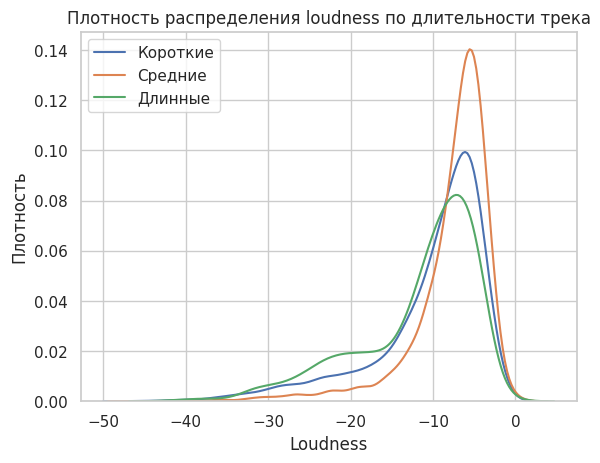

In [ ]:
# создаем подгруппы данных по категориям длительности
short = data_frame[data_frame["длительность_трека"] == "короткая"]["loudness"]
medium = data_frame[data_frame["длительность_трека"] == "средняя"]["loudness"]
long = data_frame[data_frame["длительность_трека"] == "длинная"]["loudness"]

# строим график плотности распределения для каждой категории
sns.kdeplot(short, label="Короткие")
sns.kdeplot(medium, label="Средние")
sns.kdeplot(long, label="Длинные")

# задаем заголовок и метки осей
plt.title("Плотность распределения loudness по длительности трека")
plt.xlabel("Loudness")
plt.ylabel("Плотность")

plt.legend()
plt.show()

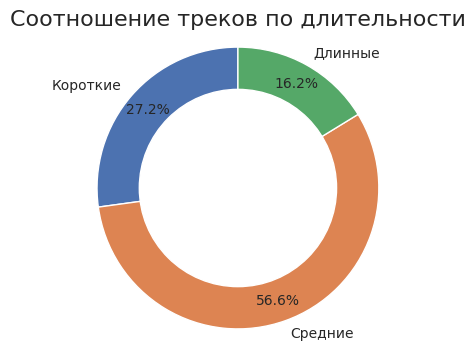

In [ ]:
# создаем подходящий DataFrame
data = {'Короткие': len(data_frame[data_frame['длительность_трека'] == 'короткая']),
        'Средние': len(data_frame[data_frame['длительность_трека'] == 'средняя']),
        'Длинные': len(data_frame[data_frame['длительность_трека'] == 'длинная'])}
labels = data.keys()
sizes = data.values()

# настраиваем параметры диаграммы
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 10})
circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(circle)
ax.axis('equal')
plt.title('Соотношение треков по длительности', fontsize=16)
plt.show()

## Часть 2

Выполните на языке R следующие задания:
- задание 1 – целиком
- задание 2 – целиком
- задание 3 – целиком
- задание 4 – целиком
- задание 5 – целиком
- задание 6 – не выполнять
- задание 7 – целиком
- задание 8 – целиком, но в третьем пункте постройте круговую диаграмму

Задание для части 2 выполняйте в отдельном гугл-колабе, настроенном для языка R. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

## Часть 3 (дополнительная)

Часть не является обязательной, но ее верное(!) выполнение освобождает вас от защиты работы.

Выполните на языке SQL следующие задания:
- задание 1 – пункт 4
- задание 2 – пункты 1, 3, 4
- задание 3 – целиком, но без графика во втором пункте
- задание 4 – не выполнять
- задание 5 – не выполнять
- задание 6 – не выполнять
- задание 7 – не выполнять
- задание 8 – пункт 1 и пункт 3 (в 3 пункте просто посчитайте количество треков каждой длительности)

Задание для части 3 выполняйте в отдельном гугл-колабе. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

#### Пример

In [ ]:
import pandas as pd
df = pd.read_csv("music_genre.csv")
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
df[["artist_name", "track_name", "music_genre"]].values.tolist()[:10]

[['Röyksopp', "Röyksopp's Night Out", 'Electronic'],
 ['Thievery Corporation', 'The Shining Path', 'Electronic'],
 ['Dillon Francis', 'Hurricane', 'Electronic'],
 ['Dubloadz', 'Nitro', 'Electronic'],
 ['What So Not', 'Divide & Conquer', 'Electronic'],
 ['Axel Boman', 'Hello', 'Electronic'],
 ['Jordan Comolli', 'Clash', 'Electronic'],
 ['Hraach', 'Delirio', 'Electronic'],
 ['Kayzo', 'NEVER ALONE', 'Electronic'],
 ['Shlump', 'Lazer Beam', 'Electronic']]

In [ ]:
import sqlite3

# создаем таблицу в БД
con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE music (artist, track, genre);")

# переносим в таблицу данные
cur.executemany("INSERT INTO music (artist, track, genre) "
                "VALUES (?, ?, ?);",
                df[["artist_name", "track_name", "music_genre"]].values.tolist())

# сохраняем изменения
con.commit()

# создаем и выполняем запрос
get_songs_per_artist = "SELECT artist, " \
       "COUNT(artist) AS number_of_songs " \
       "FROM music " \
       "GROUP BY artist " \
       "ORDER BY number_of_songs " \
       "DESC;"
cur.execute(get_songs_per_artist)

result = cur.fetchall()
result[:20]

[('empty_field', 2489),
 ('Nobuo Uematsu', 429),
 ('Wolfgang Amadeus Mozart', 402),
 ('Ludwig van Beethoven', 317),
 ('Johann Sebastian Bach', 314),
 ('Frédéric Chopin', 241),
 ('Drake', 172),
 ('Capcom Sound Team', 169),
 ('Yuki Hayashi', 167),
 ('Eminem', 147),
 ('Future', 124),
 ('Thievery Corporation', 122),
 ('The Black Keys', 114),
 ('Pyotr Ilyich Tchaikovsky', 103),
 ('Kevin Gates', 102),
 ('Mac Miller', 97),
 ('Howard Shore', 93),
 ('Logic', 92),
 ('$uicideBoy$', 92),
 ('Ryuichi Sakamoto', 90)]